## Data importing

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel('data.xlsx', index_col='Unnamed: 0')
data

,Price gold,Price nifty,Cases,Currently Infecte
2020-02-28,42810,11201.75,3,0
2020-03-06,45260,10989.45,31,28
2020-03-13,42400,9955.20,82,70
2020-03-20,42470,8745.45,249,221
2020-03-27,43524,8660.25,887,793
...,...,...,...,...
2023-03-10,58265,17412.90,44689968,3749
2023-03-17,61580,17100.05,44694349,5389
2023-03-24,60930,16945.05,44702257,8601
2023-03-31,61230,17359.75,44718781,16354


## Statistics of the data

In [10]:
data.describe()

,Price gold,Price nifty,Cases,Currently Infecte
count,152.000000,152.000000,1.520000e+02,1.520000e+02
mean,51533.013158,15181.901645,2.707332e+07,3.917141e+05
std,3674.457518,2844.823626,1.739696e+07,6.732529e+05
min,42400.000000,8083.800000,3.000000e+00,0.000000e+00
25%,49200.000000,13450.025000,9.772374e+06,1.799800e+04
50%,51207.500000,16211.200000,3.351948e+07,1.405235e+05
75%,53371.250000,17519.937500,4.376467e+07,4.413155e+05
max,62090.000000,18696.100000,4.488188e+07,3.721604e+06


## Univariate analysis

In [43]:
pct_change = data.pct_change()[2:]
pct_change.describe()

,Price gold,Price nifty,Cases,Currently Infecte
count,150.000000,150.000000,150.000000,150.000000
mean,0.002290,0.003598,0.145808,0.160840
std,0.019045,0.029933,0.478723,0.660344
min,-0.063190,-0.121519,0.000000,-0.590771
25%,-0.008920,-0.011882,0.000726,-0.129806
50%,0.003192,0.007799,0.008058,-0.045453
75%,0.012387,0.018503,0.053814,0.199241
max,0.056895,0.146336,3.691729,3.333340


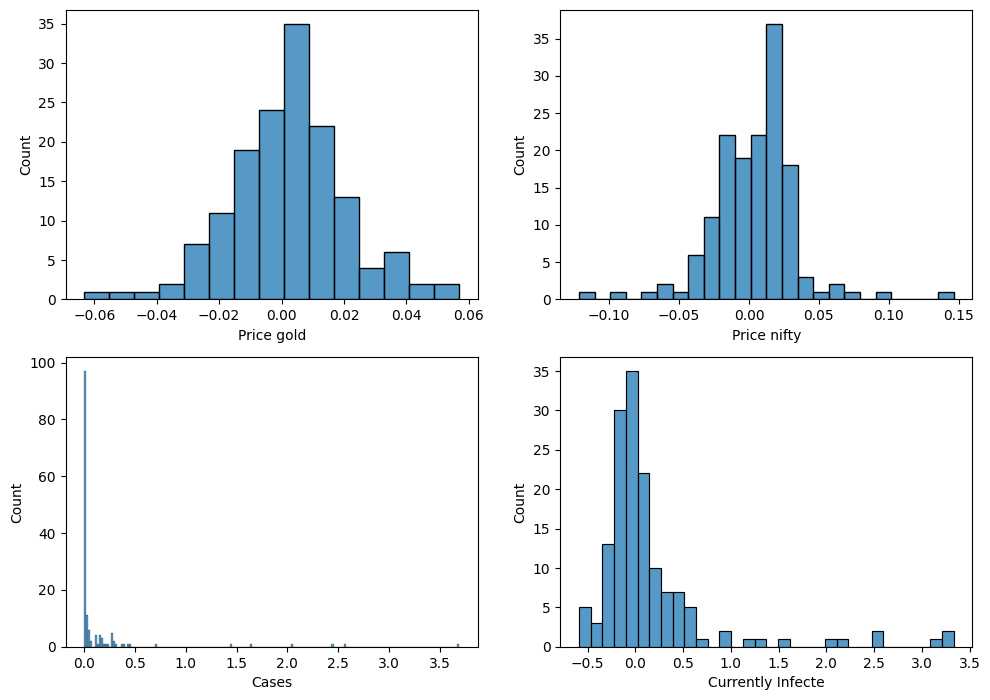

In [44]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)
date = data.index

fig.set_size_inches(11.7, 8.27)

sns.histplot(data= pct_change, x= 'Price gold', ax= ax[0][0])
sns.histplot(data= pct_change, x= 'Price nifty', ax= ax[0][1])
sns.histplot(data= pct_change, x= 'Cases', ax= ax[1][0])
sns.histplot(data= pct_change, x= 'Currently Infecte', ax= ax[1][1])

plt.show()

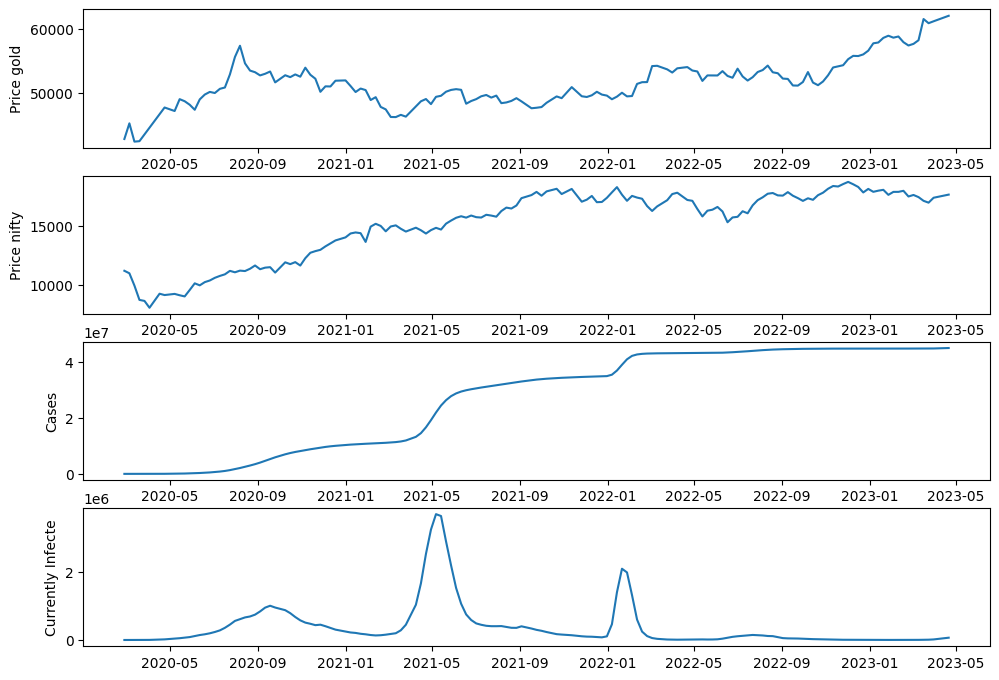

In [25]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1)
date = data.index

fig.set_size_inches(11.7, 8.27)

sns.lineplot(data = data,x = date, y = 'Price gold', ax= ax1)
sns.lineplot(data = data,x = date, y = 'Price nifty', ax= ax2)
sns.lineplot(data = data,x = date, y = 'Cases', ax= ax3)
sns.lineplot(data = data,x = date, y = 'Currently Infecte', ax= ax4)

plt.show()

